Mount the Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING INDIAN METEROLOGICAL DEPARTMENT (IMD) RAINFALL DATASETS 2022 TO 1901

In [ ]:
data_path = '/content/drive/My Drive/Rainfall-dataset-2022to1901/'
file_pattern = '{year}.nc'

In [ ]:
!pip install pyhomogeneity

In [ ]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512576 sha256=0ffda6c8a4a46fced862babcdbfd62d10fa023785c32425254fb4be314e2ea57
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install pymannkendall

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import pyproj
from shapely.geometry import Point

import pandas as pd

from fastdtw import fastdtw

from scipy.stats import kendalltau, norm, linregress

import pyhomogeneity as hg

In [ ]:
ds = xr.open_dataset(data_path + file_pattern.format(year=2022))
print(ds)
ds

<xarray.Dataset>
Dimensions:    (LONGITUDE: 35, LATITUDE: 33, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 19-Jan-23
    Conventions:  CF-1.6


<xarray.Dataset>
Dimensions:    (LONGITUDE: 35, LATITUDE: 33, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 ... 97.5 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 19-Jan-23
    Conventions:  CF-1.6

Shapefile Load

In [ ]:
#load India shapefile
import geopandas as gpd
India_shapefile_path = '/content/drive/My Drive/AmmuProject/IndiaDisShapefile/output.shp'
India_shapefile = gpd.read_file(India_shapefile_path)

Kerala range

In [ ]:
Kerala_shapefile = India_shapefile[India_shapefile['statename'] == 'Kerala']

In [ ]:
import geopandas as gpd

# Extract the geometry of the Kerala polygon
Kerala_geometry = Kerala_shapefile['geometry'].iloc[0]

# Get the bounding box (envelope) of the Kerala polygon
Kerala_bbox = Kerala_geometry.bounds

# Extract latitude and longitude range
long_min, lat_min, long_max, lat_max = Kerala_bbox

print(f"Latitude Range: {lat_min} to {lat_max}")
print(f"Longitude Range: {long_min} to {long_max}")


Latitude Range: 11.675069999908382 to 12.30163999961343
Longitude Range: 75.16493999993746 to 75.94090000015352


In [ ]:
# Approximate boundaries for Kerala
lat_min = 8.18
lat_max = 12.74
lon_min = 74.78
lon_max = 77.36


AVERAGE DAILY RAINFALL OF kerala FROM 2022 TO 1901

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the NetCDF file
file_pattern = '{year}.nc'  # Adjust the pattern to match your file names

# Load all NetCDF files
years = np.arange(1901, 2023)  # Assuming your data covers the years from 1910 to 2022
ds_list = [xr.open_dataset(data_path + file_pattern.format(year=year)) for year in years]


# Filter the NetCDF files to include only those within the defined latitude and longitude ranges
ds_list = [ds for ds in ds_list if (ds['LATITUDE'].min() >= lat_min and ds['LATITUDE'].max() <= lat_max) and (ds['LONGITUDE'].min() >= lon_min and ds['LONGITUDE'].max() <= lon_max)]


# Calculate annual average rainfall for each year
for year in years:
    ds = xr.open_dataset(data_path + file_pattern.format(year=year))
    annual_avg_rainfall = ds['RAINFALL'].mean(dim=['LATITUDE', 'LONGITUDE'])

    # Plot the average rainfall for the current year
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, len(annual_avg_rainfall.data) + 1), annual_avg_rainfall.data, marker='o', linestyle='-')
    plt.xlabel('Days')
    plt.ylabel('Average Rainfall (mm)')
    plt.title(f'Average Rainfall in {year}')
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

SUM OF DAILY RAINFALL

In [ ]:
import pyproj
from shapely.geometry import Point

for year in range(2022, 1900, -1):
  rainfall_data = xr.open_dataset(data_path + f'{year}.nc')
  # Find latitude and longitude indices within the kerala PRADESH's boundaries
  latitude_indices = np.where((rainfall_data['LATITUDE'] >=lat_min ) & (rainfall_data['LATITUDE'] <= lat_max))[0]
  longitude_indices = np.where((rainfall_data['LONGITUDE'] >= lon_min) & (rainfall_data['LONGITUDE'] <= lon_max))[0]

  # Slice the rainfall data for kerala PRADESH
  kerala_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
  #Calculate the average and sum rainfall for each day over the entire time range
  average_rainfall_per_day = np.mean(kerala_rainfall_data, axis=(1, 2))
  sum_rainfall_per_day = np.sum(kerala_rainfall_data, axis=(1, 2))
  # Plot the sum rainfall for each day using a line plot
  plt.figure(figsize=(12, 6))
  plt.plot(np.arange(1, len(sum_rainfall_per_day) + 1),sum_rainfall_per_day , marker='o', linestyle='-', color='b')
  plt.xlabel('Day of the Year')
  plt.ylabel('Sum Rainfall (mm)')
  plt.title(f'Sum Daily Rainfall in kerala for {year}')
  plt.grid(True)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

MONTHLY AVERAGE

In [ ]:
# Loop through each year
for year in range(1901, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    # Find latitude and longitude indices within the Kerala's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'].values >= lat_min) & (rainfall_data['LATITUDE'].values <= lat_max))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'].values >= lon_min) & (rainfall_data['LONGITUDE'].values <= lon_max))[0]

    # Slice the rainfall data for Kerala
    kerala_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
    average_rainfall_per_day = np.mean(kerala_rainfall_data, axis=(1, 2))
    # Resample the data to monthly rainfall
    kerala_monthly_rainfall = average_rainfall_per_day.resample(TIME='1M').sum()

    y_data = kerala_monthly_rainfall.values.squeeze()

    # Plot the average monthly rainfall using a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(months, y_data, marker='o', linestyle='-', color='b')
    plt.xlabel('Month')
    plt.ylabel('Average Rainfall (mm)')
    plt.title(f'Average Monthly Rainfall in Kerala for {year}, Kerala')
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Loop through each year in descending order (from 2022 to 1901)
for year in range(2022, 1900, -1):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within Kerala's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= lat_min) & (rainfall_data['LATITUDE'] <= lat_max))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= long_min) & (rainfall_data['LONGITUDE'] <= long_max))[0]

    # Slice the rainfall data for Kerala
    kerala_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Resample the data to monthly averages
    kerala_monthly_average_rainfall = kerala_rainfall_data.resample(TIME='1M').mean()

    # Extract the monthly average rainfall values
    y_data = kerala_monthly_average_rainfall.mean(dim=['LATITUDE', 'LONGITUDE']).values.squeeze()

    # Plot the average monthly rainfall using a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(months, y_data, color='b')
    plt.xlabel('Month')
    plt.ylabel('Average Rainfall (mm)')
    plt.title(f'Monthly Average Rainfall in Karnataka for {year}')
    plt.grid(axis='y')
    plt.show()

    # Close the NetCDF dataset to free up resources
    rainfall_data.close()


Output hidden; open in https://colab.research.google.com to view.

AVERAGE MONTHLY FOR YEARS FROM 1901 TO 2022

In [ ]:
import pandas as pd

dfs_kerala = []

for year in range(1901, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within Kerala's boundaries
    latitude_indices_kerala = np.where((rainfall_data['LATITUDE'] >= lat_min) & (rainfall_data['LATITUDE'] <= lat_max))[0]
    longitude_indices_kerala = np.where((rainfall_data['LONGITUDE'] >= lon_min) & (rainfall_data['LONGITUDE'] <= lon_max))[0]

    # Slice the rainfall data for Kerala
    kerala_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices_kerala, longitude_indices_kerala]

    # Resample the data to monthly averages for Kerala
    kerala_monthly_average_rainfall = kerala_rainfall_data.resample(TIME='1M').mean()

    # Calculate mean for each month
    monthly_means = kerala_monthly_average_rainfall.mean(dim=['LATITUDE', 'LONGITUDE']).values.tolist()

    # Create DataFrame for the current year in Kerala
    df_kerala = pd.DataFrame({
        'Year': [year] * len(months),
        'Month': months,
        'Average Rainfall': monthly_means
    })

    # Append the DataFrame to the list
    dfs_kerala.append(df_kerala)

# Concatenate all DataFrames into a single DataFrame for Kerala
result_df_kerala = pd.concat(dfs_kerala, ignore_index=True)

# Print the results for Kerala
print("Kerala Data:")
print(result_df_kerala)


Kerala Data:
      Year Month  Average Rainfall
0     1901   Jan          0.710881
1     1901   Feb          1.228732
2     1901   Mar          1.470673
3     1901   Apr          3.866677
4     1901   May          4.301211
...    ...   ...               ...
1459  2022   Aug         13.683645
1460  2022   Sep          5.462820
1461  2022   Oct          5.611620
1462  2022   Nov          3.619851
1463  2022   Dec          2.213770

[1464 rows x 3 columns]


In [ ]:
import calendar

DYNAMIC TIME WARPING (DTW) FOR ANALYSING THE SIMILARITY OF MONTHLY AVERAGE RAINFALL FROM 2022 TO 190

In [ ]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512410 sha256=3ec6d7d7c3cb21ef61aca5a241185705f1aeac76d84b8bce026a24a7102a4482
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
for year1 in range(2022,1900,-1):
  dfs = []
  # Load the rainfall data for the current years
  rainfall_data1 = xr.open_dataset(data_path + f'{year1}.nc')

  # Find latitude and longitude indices within the ARUNACHAL PRADESH's boundaries
  latitude_indices1 = np.where((rainfall_data1['LATITUDE'] >= lat_min) & (rainfall_data1['LATITUDE'] <= lat_max))[0]
  longitude_indices1 = np.where((rainfall_data1['LONGITUDE'] >= lon_min) & (rainfall_data1['LONGITUDE'] <= lon_max))[0]

  # Slice the rainfall data for KERALA
  kerala_rainfall_data1 = rainfall_data1['RAINFALL'][:, latitude_indices1, longitude_indices1]
  average_rainfall_per_day1 = np.mean(kerala_rainfall_data1, axis=(1, 2))
  # Resample the data to monthly averages
  kerala_monthly_average_rainfall1 = average_rainfall_per_day1.resample(TIME='1M').mean()

  for year2 in range(year1-1,1900,-1):

    # Load the rainfall data for the current years
    rainfall_data2 = xr.open_dataset(data_path + f'{year2}.nc')

    # Find latitude and longitude indices within the KERALA's boundaries
    latitude_indices2 = np.where((rainfall_data2['LATITUDE'] >= lat_min) & (rainfall_data2['LATITUDE'] <= lat_max))[0]
    longitude_indices2 = np.where((rainfall_data2['LONGITUDE'] >= lon_min) & (rainfall_data2['LONGITUDE'] <= lon_max))[0]

    # Slice the rainfall data for KERALA
    kerala_rainfall_data2 = rainfall_data2['RAINFALL'][:, latitude_indices2, longitude_indices2]
    average_rainfall_per_day2 = np.mean(kerala_rainfall_data2, axis=(1, 2))
    # Resample the data to monthly averages
    kerala_monthly_average_rainfall2 = average_rainfall_per_day2.resample(TIME='1M').mean()

    dtw_distance, _ = fastdtw(kerala_monthly_average_rainfall1, kerala_monthly_average_rainfall2)

    # Store the DTW distance and the corresponding year
    dfs.append({'Year': year2, 'DTW Distance': dtw_distance})

    # Create a DataFrame from the list of dictionaries
    result_df = pd.DataFrame(dfs)

  # Plot the DTW distances
  plt.figure(figsize=(40, 6))
  plt.plot(result_df['Year'], result_df['DTW Distance'], marker='o', linestyle='-', color='b')
  plt.xlabel('Years')
  plt.ylabel('DTW Distance')
  plt.title(f'Similarity of KERALA\'s Average Monthly Rainfall of {year1} ')
  plt.xticks(np.arange(min(result_df['Year']), max(result_df['Year']) + 1, 1), rotation=45, ha='right')
  plt.grid(True)
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

DATAFRAME

In [ ]:
dfs = []

for year in range(1901, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within the state's boundaries
    latitude_indices1 = np.where((rainfall_data1['LATITUDE'] >= lat_min) & (rainfall_data1['LATITUDE'] <= lat_max))[0]
    longitude_indices1 = np.where((rainfall_data1['LONGITUDE'] >= lon_min) & (rainfall_data1['LONGITUDE'] <= lon_max))[0]

    # Slice the rainfall data for the state
    kerala_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Resample the data to monthly averages

    average_rainfall_per_day = np.mean(kerala_rainfall_data, axis=(1, 2))
    kerala_monthly_rainfall = average_rainfall_per_day.resample(TIME='1M').sum()
    df_year = pd.DataFrame({
        'Year': [year] * len(kerala_monthly_rainfall['TIME']),
        'Month': kerala_monthly_rainfall['TIME'].dt.strftime('%b'),
        'Monthly Rainfall': kerala_monthly_rainfall.values.flatten()
    })

    # Append the DataFrame to the list
    dfs.append(df_year)

# Concatenate all DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Pivot the DataFrame to have months as columns
result_df_pivoted = result_df.pivot_table(index='Year', columns='Month', values='Monthly Rainfall', aggfunc='sum', fill_value=0)

# Add a column for Total Annual Rainfall
result_df_pivoted['Total Annual Rainfall'] = result_df_pivoted.sum(axis=1)

# Reset index to make 'Year' a column again
result_df_pivoted = result_df_pivoted.reset_index()

# Display the resulting DataFrame
print(result_df_pivoted)

Month  Year         Apr          Aug         Dec        Feb         Jan  \
0      1901   96.892057   397.539496   42.316647  21.672447   16.913370   
1      1902   74.732114   291.260530  111.087467   2.455842    8.376225   
2      1903   27.851495   443.426654   20.472506   0.000000    0.334617   
3      1904   71.707426   314.607568    0.000000   4.612938   16.080544   
4      1905   28.682392   278.754060    0.000000   8.844064    0.117880   
..      ...         ...          ...         ...        ...         ...   
117    2018   91.131766   832.359344   22.655768   0.346399    5.312737   
118    2019   53.876412  1323.649432   37.823945   1.470625    1.191696   
119    2020  126.694654   367.523433   56.792008   4.125685    9.803458   
120    2021   96.595754   417.471172   18.209611   6.396436  115.328847   
121    2022  142.188642   668.024943   79.874440   0.343703    0.739708   

Month          Jul          Jun        Mar         May         Nov  \
0       817.178671   949.1467

In [ ]:
print(np.mean(result_df_pivoted['Total Annual Rainfall'] ))

3039.588754609553


MEAN, STANDARD DEVIATION, RANGE OF TOTAL ANNUAL RAINFALL, POINT OF HIGHEST AND LOWEST RAINFALL

In [ ]:
mean = np.mean(result_df_pivoted['Total Annual Rainfall'] )
std = np.std(result_df_pivoted['Total Annual Rainfall'] )
print(f"Mean of Total Annual Rainfall: {mean} mm")
print(f"Standard deviation of Total Annual Rainfall: {std} mm")
print(f"Range of Total Annual Rainfall: {mean - std}mm <= Rainfall <= {mean + std}mm")
print('\n')
max_rainfall_year = result_df_pivoted.loc[result_df_pivoted['Total Annual Rainfall'].idxmax(), 'Year']
max_rainfall_value = result_df_pivoted['Total Annual Rainfall'].max()

print(f"Year with the Highest Rainfall: {max_rainfall_year}")
print(f"Highest Rainfall Value: {max_rainfall_value} mm")
print('\n')
min_rainfall_year = result_df_pivoted.loc[result_df_pivoted['Total Annual Rainfall'].idxmin(), 'Year']
min_rainfall_value = result_df_pivoted['Total Annual Rainfall'].min()

print(f"Year with the Lowest Rainfall: {min_rainfall_year}")
print(f"Lowest Rainfall Value: {min_rainfall_value} mm")

Mean of Total Annual Rainfall: 3039.588754609553 mm
Standard deviation of Total Annual Rainfall: 511.8575526118186 mm
Range of Total Annual Rainfall: 2527.7312019977344mm <= Rainfall <= 3551.446307221371mm


Year with the Highest Rainfall: 1961
Highest Rainfall Value: 5058.288472813864 mm


Year with the Lowest Rainfall: 2010
Lowest Rainfall Value: 1546.0587035367885 mm


YEARS WITH ANNUAL RAINFALL ABOVE 95 PERCENTILE AND BELOW 5 PERCENTILE FOR YEARS FROM 2010 TO 2022

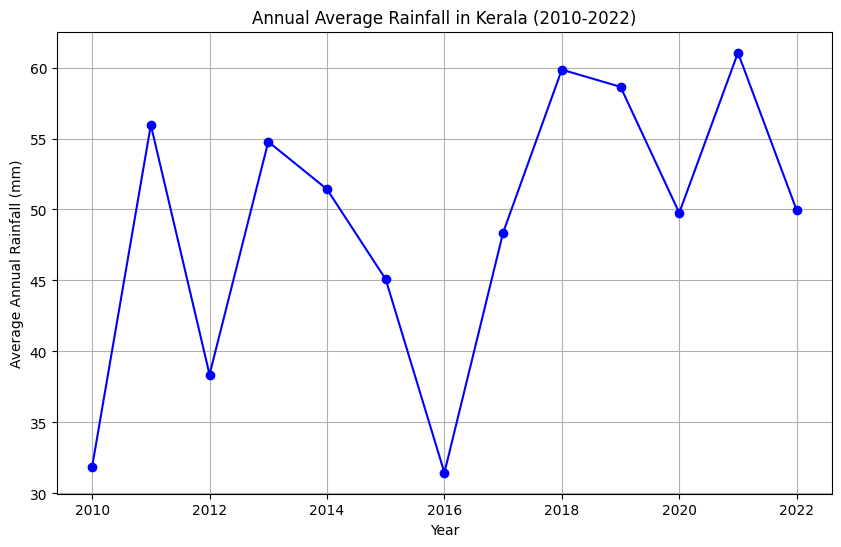

Years above 95th percentile: [2021]
Years below 5th percentile: [2016]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr



# Initialize an empty list to store annual average rainfall
annual_averages = []

# Loop through each year in the specified range (2010 to 2022)
for year in range(2010, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    # Find latitude and longitude indices within kerala's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= lat_min) & (rainfall_data['LATITUDE'] <= lat_max))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= lon_min) & (rainfall_data['LONGITUDE'] <= lon_max))[0]

    # Slice the rainfall data for kerala
    kerala_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Calculate the annual average rainfall
    annual_average_rainfall = kerala_rainfall_data.mean(dim='TIME').sum().item()
    annual_averages.append(annual_average_rainfall)

    # Close the NetCDF dataset to free up resources
    rainfall_data.close()

# Plot the annual average rainfall
plt.figure(figsize=(10, 6))
plt.plot(range(2010, 2023), annual_averages, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall (mm)')
plt.title('Annual Average Rainfall in Kerala (2010-2022)')
plt.grid(True)
plt.show()

# Calculate percentiles
percentile_5 = np.percentile(annual_averages, 5)
percentile_95 = np.percentile(annual_averages, 95)

# Print years above 95th percentile
above_95 = [year for year, avg in zip(range(2010, 2023), annual_averages) if avg > percentile_95]
print(f'Years above 95th percentile: {above_95}')

# Print years below 5th percentile
below_5 = [year for year, avg in zip(range(2010, 2023), annual_averages) if avg < percentile_5]
print(f'Years below 5th percentile: {below_5}')


MONTHLY RAINFALL ANALYSIS FOR 1901 TO 2022

In [ ]:
from scipy.stats import zscore
for month in months:
  # Calculate the Z-scores for the 'month' column
  z_scores = zscore(result_df_pivoted[month])

  # Define a threshold for identifying outliers (e.g., Z-score greater than 2)
  outlier_threshold = 2

  # Identify outlier indices
  outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

  # Plot the line graph with outliers highlighted
  plt.figure(figsize=(40, 6))
  plt.plot(result_df_pivoted['Year'], result_df_pivoted[month], marker='o', linestyle='-', color='b')
  plt.scatter(result_df_pivoted['Year'].iloc[outlier_indices], result_df_pivoted[month].iloc[outlier_indices], color='r', label='Outliers',  zorder=5)
  plt.xlabel('Years')
  plt.ylabel('Monthly Rainfall (mm)')
  plt.title(f'Monthly Rainfall in Kerala on {month} with Outliers')
  plt.xticks(np.arange(min(result_df_pivoted['Year']), max(result_df_pivoted['Year']) + 1, 1), rotation=45, ha='right')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Print information about outliers
  print(f"Number of Outliers: {len(outlier_indices)}")
  print(f"Outlier Years: {result_df_pivoted['Year'].iloc[outlier_indices].tolist()}")
  print(f"Outlier Values: {result_df_pivoted[month].iloc[outlier_indices].tolist()}")

Output hidden; open in https://colab.research.google.com to view.

TOTAL ANNUAL RAINFALL ANALYSIS

In [ ]:
from scipy.stats import zscore

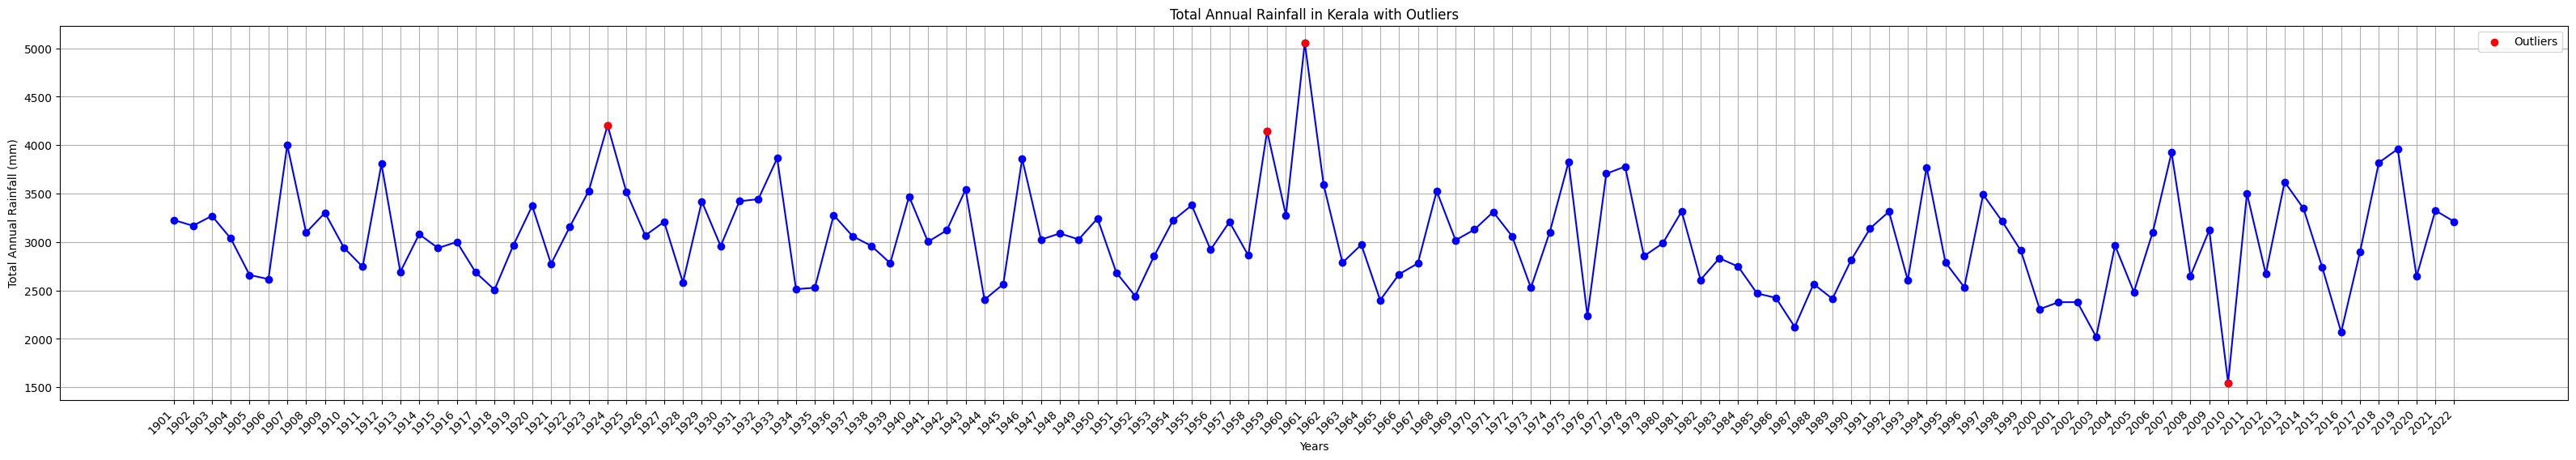

Number of Outliers: 4
Outlier Years: [1924, 1959, 1961, 2010]
Outlier Values: [4205.372216771047, 4146.695400252938, 5058.288472813864, 1546.0587035367885]


In [ ]:
# Calculate the Z-scores for the 'Total Annual Rainfall' column
z_scores = zscore(result_df_pivoted['Total Annual Rainfall'])

# Define a threshold for identifying outliers (e.g., Z-score greater than 2)
outlier_threshold = 2

# Identify outlier indices
outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

# Plot the line graph with outliers highlighted
plt.figure(figsize=(40, 6))
plt.plot(result_df_pivoted['Year'], result_df_pivoted['Total Annual Rainfall'], marker='o', linestyle='-', color='b')
plt.scatter(result_df_pivoted['Year'].iloc[outlier_indices], result_df_pivoted['Total Annual Rainfall'].iloc[outlier_indices], color='r', label='Outliers',  zorder=5)
plt.xlabel('Years')
plt.ylabel('Total Annual Rainfall (mm)')
plt.title('Total Annual Rainfall in Kerala with Outliers')
plt.xticks(np.arange(min(result_df_pivoted['Year']), max(result_df_pivoted['Year']) + 1, 1), rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# Print information about outliers
print(f"Number of Outliers: {len(outlier_indices)}")
print(f"Outlier Years: {result_df_pivoted['Year'].iloc[outlier_indices].tolist()}")
print(f"Outlier Values: {result_df_pivoted['Total Annual Rainfall'].iloc[outlier_indices].tolist()}")

10 year Interval Rainfall average

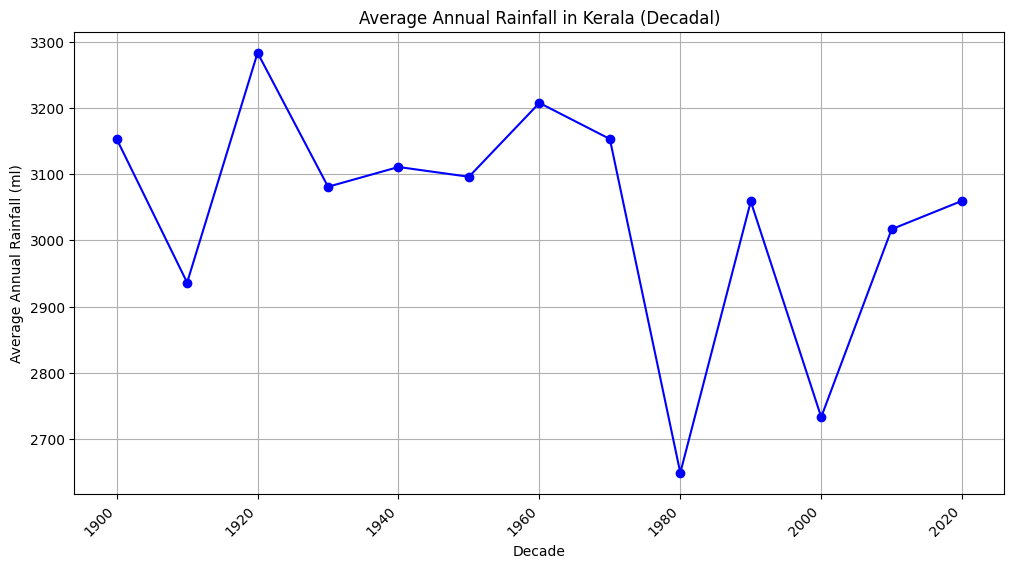

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


# Calculate average annual rainfall across each 10 years
result_df_pivoted['Decade'] = (result_df_pivoted['Year'] // 10) * 10
decadal_average_rainfall = result_df_pivoted.groupby('Decade')['Total Annual Rainfall'].mean()

# Plot the decadal average annual rainfall as a line plot
plt.figure(figsize=(12, 6))
plt.plot(decadal_average_rainfall.index, decadal_average_rainfall, marker='o', color='b', linestyle='-')
plt.xlabel('Decade')
plt.ylabel('Average Annual Rainfall (ml)')
plt.title(f'Average Annual Rainfall in Kerala (Decadal)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

MONTHLY RAINFALL ANALYSIS FROM 1901 TO 2022

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Calculate average annual rainfall across each 10 years
result_df_pivoted['Decade'] = (result_df_pivoted['Year'] // 10) * 10
decadal_average_rainfall = result_df_pivoted.groupby('Decade')['Total Annual Rainfall'].mean()

# Print the mean and standard deviation
mean_rainfall = decadal_average_rainfall.mean()
std_rainfall = decadal_average_rainfall.std()

print(f"Mean Annual Rainfall: {mean_rainfall} mm")
print(f"Standard Deviation of Annual Rainfall: {std_rainfall} mm")

Mean Annual Rainfall: 3041.554971004154 mm
Standard Deviation of Annual Rainfall: 178.36068079832634 mm


MANN-KENDALL AND SEN SLOPE

In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

result, _ = kendalltau(df_selected_years['Year'],df_selected_years['Total Annual Rainfall'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

result_s = linregress(df_selected_years['Year'], df_selected_years['Total Annual Rainfall'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
#print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Slope (Sen's Slope): {result_s.slope}")

if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.scope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2017
2022
Mann-Kendall Test Result for Yearly Sum of Rainfall (2017 to 2022):
P-value: 0.9468470713992698
Theil-Sen Estimator Result for Yearly Sum of Rainfall (2017 to 2022):
Slope (Sen's Slope): -35.55583622342071
No significant trend


In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

result, _ = kendalltau(df_selected_years['Year'],df_selected_years['Total Annual Rainfall'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

result_s = linregress(df_selected_years['Year'], df_selected_years['Total Annual Rainfall'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
#print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Slope (Sen's Slope): {result_s.slope}")

if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.scope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2020
2022
Mann-Kendall Test Result for Yearly Sum of Rainfall (2020 to 2022):
P-value: 0.7388826803635272
Theil-Sen Estimator Result for Yearly Sum of Rainfall (2020 to 2022):
Slope (Sen's Slope): 283.1392031709356
No significant trend


PETTITT TEST

In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Total Annual Rainfall'])

# Display Pettitt test result
print(f"Pettitt Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2020
2022
Pettitt Test Result for Yearly Sum of Rainfall (2020 to 2022):
Change detected: True
Change point index: 1
P-value: 0.0
Test Statistic (U): 2.0
Mean Before Change (mu1): 2643.8641626089807
Mean After Change (mu2): 3267.8728065279624


In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Total Annual Rainfall'])

# Display Pettitt test result
print(f"Pettitt Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2017
2020
Pettitt Test Result for Yearly Sum of Rainfall (2017 to 2020):
Change detected: True
Change point index: 2
P-value: 0.0
Test Statistic (U): 4.0
Mean Before Change (mu1): 1272.1262755520916
Mean After Change (mu2): 1534.555222335513
